In [40]:
%%HTML
<img src='codes.jpg'>

In [26]:
import csv
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
%matplotlib notebook

In [2]:
from scipy.interpolate import interp1d
from copy import deepcopy

In [3]:
def inter(Obs, ndots=100):
    interpolated = []
    for obs in Obs:
        x = np.linspace(0, 100, num=obs.shape[0], endpoint=True)
        f = interp1d(x, obs, kind='slinear')
        xnew = np.linspace(0, 100, num=ndots, endpoint=True)
        interpolated.append(f(xnew))
    return interpolated
def interfu(Obs, ndots=100):
    interpolated = []
    for obs in Obs:
        l = len(obs)
        step = 1.0*l/ndots
        xnew = []
        i = 0
        while (i < l-1):
            a = int(i + 0.5)
            xnew.append(obs[a])
            i = i + step
        interpolated.append(xnew)
    return interpolated
def cutbeginning(Obs, w=1):
    arr = []
    for obs in Obs:
        i = 0
        while abs(obs[i]) < w:
            i += 1
        arr.append(obs[i:])
    return np.array(arr) 

In [89]:
def stat(data):
    for block in data:
        lens = []
        for s in data[block]['acc']['x']:
            lens.append(len(s))
        size = len(data[block]['acc']['x'])
        print block, ':  size =',size, '  median length =',np.median(lens), '  min length =',np.min(lens), '  max length =',np.max(lens)

In [7]:
def integrate(data):
    data_int = deepcopy(data)
    for block in data_int:
        for signal_type in data_int[block]:
            for axis in data_int[block][signal_type]:
                for obs_ind in range(len(data_int[block][signal_type][axis])):
                    data_int[block][signal_type][axis][obs_ind] = np.cumsum(data_int[block][signal_type][axis][obs_ind])
    return data_int

In [73]:
data = {}
with open('sensor_data_a.txt', 'rb') as csvfile:
    reader = csv.reader(csvfile, delimiter=',', quotechar='|')
    for row in reader:
        block = row[-1][1:]
        if block.isdigit():
            block = int(block)
        del row[-1]
        del row[0]
        if not block in data:
            data[block] = {}
            data[block]['gyr'] = {}
            data[block]['acc'] = {}
            data[block]['gyr']['x'] = []
            data[block]['gyr']['y'] = []
            data[block]['gyr']['z'] = []
            data[block]['acc']['x'] = []
            data[block]['acc']['y'] = []
            data[block]['acc']['z'] = []
        frow = np.array(map(float, row))
        data[block]['acc']['x'].append(np.array(frow[range(0,len(row),6)]))
        data[block]['acc']['y'].append(np.array(frow[range(1,len(row),6)]))
        data[block]['acc']['z'].append(np.array(frow[range(2,len(row),6)]))
        data[block]['gyr']['x'].append(np.array(frow[range(3,len(row),6)]))
        data[block]['gyr']['y'].append(np.array(frow[range(4,len(row),6)]))
        data[block]['gyr']['z'].append(np.array(frow[range(5,len(row),6)]))

In [90]:
stat(data)

1 :  size = 13   median length = 48.0   min length = 39   max length = 80
2 :  size = 7   median length = 37.0   min length = 30   max length = 52
3 :  size = 6   median length = 34.5   min length = 32   max length = 41
4 :  size = 7   median length = 36.0   min length = 34   max length = 43
5 :  size = 4   median length = 38.0   min length = 37   max length = 41
6 :  size = 5   median length = 37.0   min length = 35   max length = 41
7 :  size = 5   median length = 37.0   min length = 35   max length = 41
8 :  size = 9   median length = 36.0   min length = 33   max length = 40
9 :  size = 9   median length = 30.0   min length = 25   max length = 36
10 :  size = 4   median length = 29.5   min length = 28   max length = 32
11 :  size = 8   median length = 26.0   min length = 22   max length = 29
12 :  size = 11   median length = 29.0   min length = 26   max length = 32
13 :  size = 11   median length = 35.0   min length = 29   max length = 45
14 :  size = 9   median length = 30.0   min 

In [37]:
def plot_block_signal(data, n_block):
    plt.figure(figsize=(10, 5))
    plt.subplot(231)
    for series in data[n_block]['gyr']['x']:
        plt.plot(series, 'b', linewidth=3, alpha=0.5)
    plt.title('x')
    plt.ylabel('Gyroscope')
    plt.subplot(232)
    for series in data[n_block]['gyr']['y']:
        plt.plot(series, 'r', linewidth=3, alpha=0.5)
    plt.title('y')
    plt.subplot(233)
    for series in data[n_block]['gyr']['z']:
        plt.plot(series, 'g', linewidth=3, alpha=0.5)
    plt.title('z')
    plt.subplot(234)
    for series in data[n_block]['acc']['x']:
        plt.plot(series, 'b', linewidth=3, alpha=0.5)
    plt.ylabel('Accelerometer')
    plt.subplot(235)
    for series in data[n_block]['acc']['y']:
        plt.plot(series, 'r', linewidth=3, alpha=0.5)
    plt.subplot(236)
    for series in data[n_block]['acc']['z']:
        plt.plot(series, 'g', linewidth=3, alpha=0.5)
    plt.show()
    
def plot_block_gest(data, n_block):
    fig = plt.figure(figsize=(10, 5))
    ax = fig.add_subplot(121, projection='3d')
    for ind in range(len(data[n_block]['gyr']['x'])):
        ax.plot(data[n_block]['gyr']['x'][ind], data[n_block]['gyr']['y'][ind], data[n_block]['gyr']['z'][ind])
    ax.set_title('Gyroscope')
    ax = fig.add_subplot(122, projection='3d')
    for ind in range(len(data[n_block]['acc']['x'])):
        ax.plot(data[n_block]['acc']['x'][ind], data[n_block]['acc']['y'][ind], data[n_block]['acc']['z'][ind])
    ax.set_title('Accelerometer')
    plt.show()

In [71]:
data1 = integrate(data)
data2 = integrate(data1)

<IPython.core.display.Javascript object>


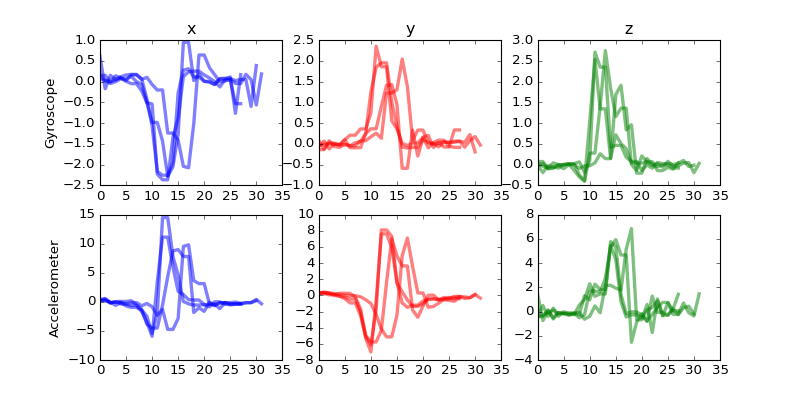

In [33]:
plot_block_signal(data, 10)

<IPython.core.display.Javascript object>


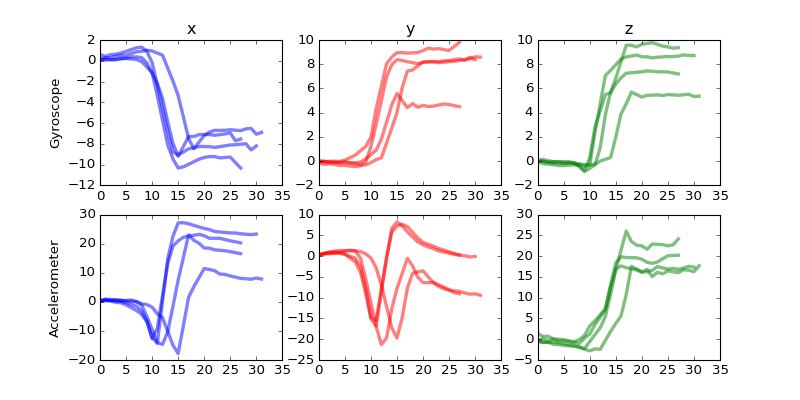

In [34]:
plot_block_signal(data1, 10)

<IPython.core.display.Javascript object>


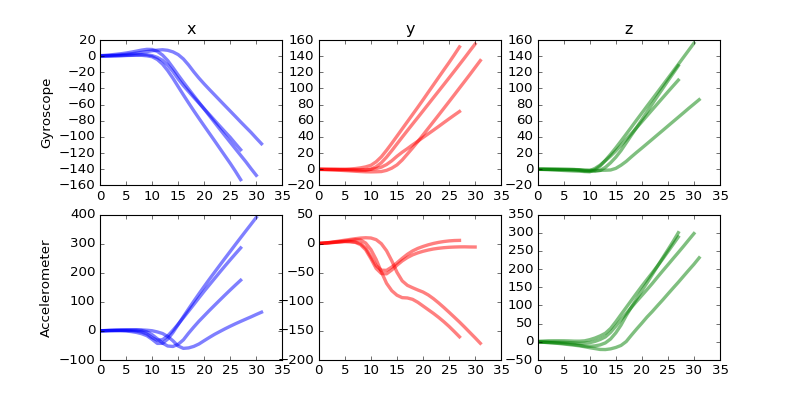

In [35]:
plot_block_signal(data2, 10)

<IPython.core.display.Javascript object>


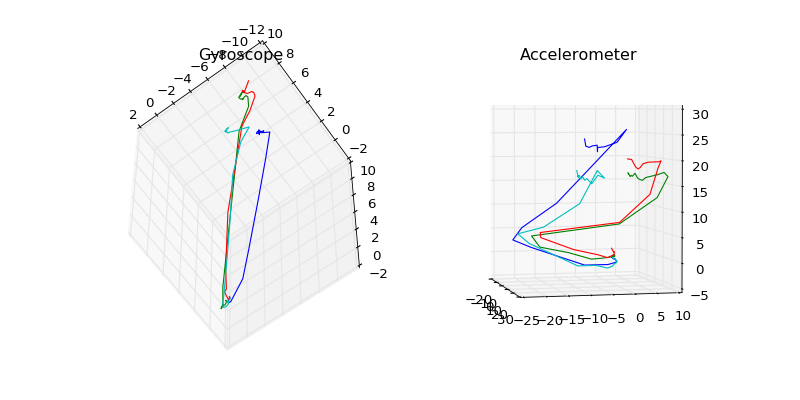

In [38]:
plot_block_gest(data1, 10)

<IPython.core.display.Javascript object>


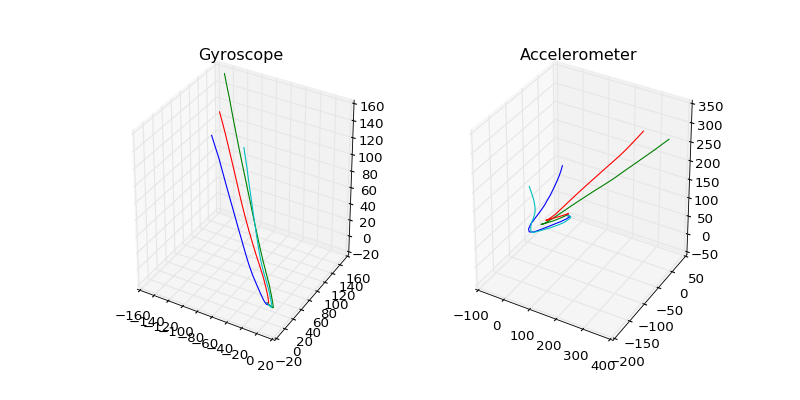

In [72]:
plot_block_gest(data2, 10)

<IPython.core.display.Javascript object>


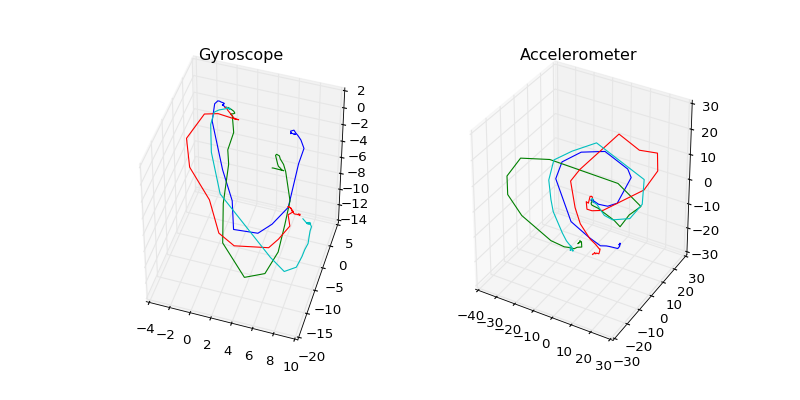

In [41]:
plot_block_gest(data1, 5)

<IPython.core.display.Javascript object>


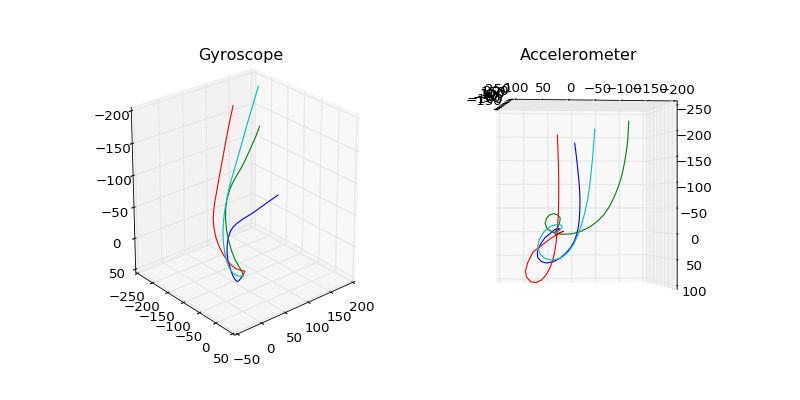

In [42]:
plot_block_gest(data2, 5)

<IPython.core.display.Javascript object>


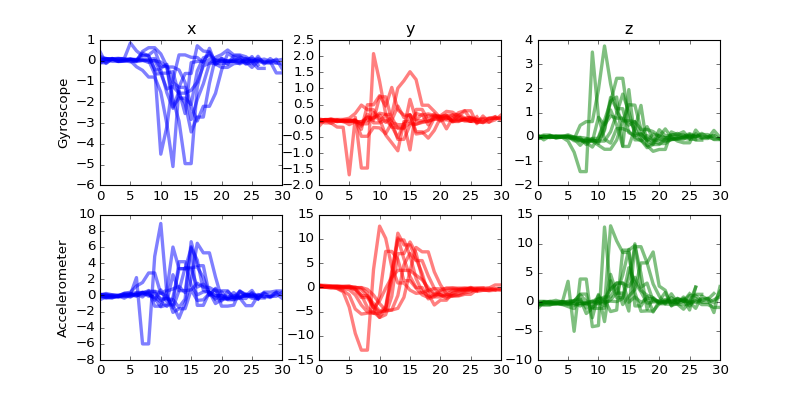

In [95]:
plot_block_signal(data, 14)

<IPython.core.display.Javascript object>


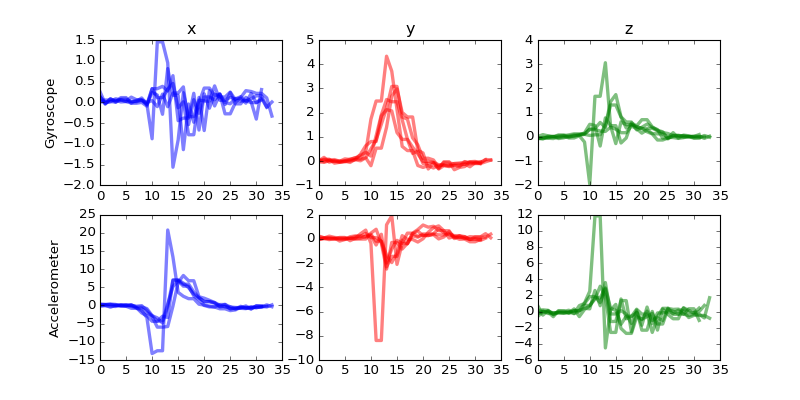

In [94]:
plot_block_signal(data, 15)